Metody zpracování signálu ve frekvenční oblasti
- Frekvenční spektrum signálu
    - **Fourierova řada**
    - Fourierova transformace 

Pomocí fourierovy řady aproximujte 
- **lineární funkci**
- pilový signál
- obdélníkový signál

Fourierova řada
$$f(t) = a_0 + \sum_{n=1}^\infty \left[ a_n \cos(nt) + b_n \sin(nt) \right] \hspace{0.5cm} t \in (-\pi,-\pi)$$
$$a_0 = \frac{1}{2\pi} \int_{-\pi}^{\pi} f(t) {\rm d}t $$
$$a_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(t) \cos(nt) {\rm d}t $$
$$b_n = \frac{1}{\pi} \int_{-\pi}^{\pi} f(t) \sin(nt) {\rm d}t $$

Aproximace lineární funkce $f(t) = t \hspace{0.5cm} t \in (-\pi,-\pi)$
$$f(t) = \sum_{n=1}^{\infty}  \frac{2}{n}(-1)^{n+1} \sin(nt) = t$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
import scipy as sp
from scipy import signal


In [2]:

def Bcoef(n, tvec):
    Bi= ((2/n)*(-1)**(n+1))*np.sin(n*tvec)
    return np.array(Bi)


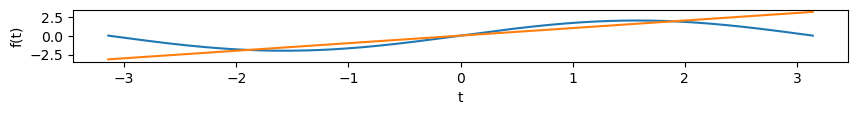

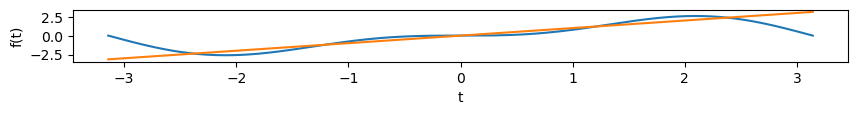

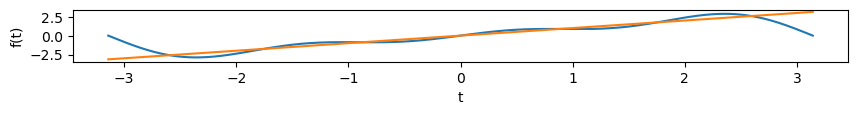

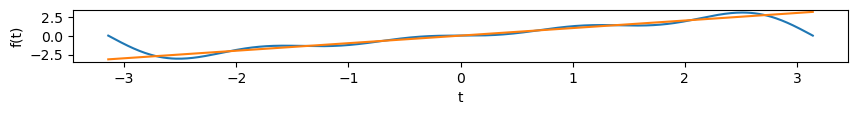

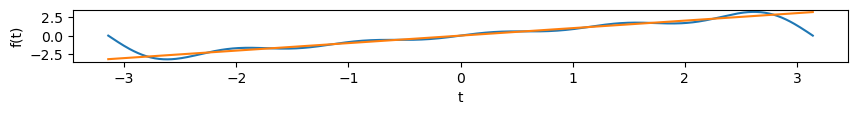

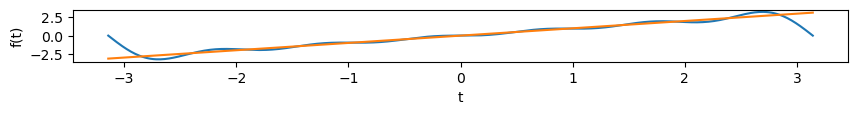

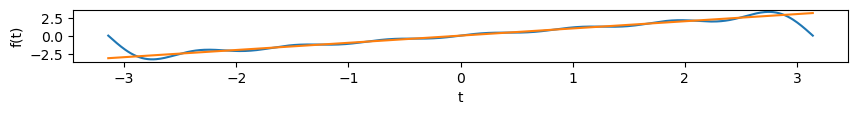

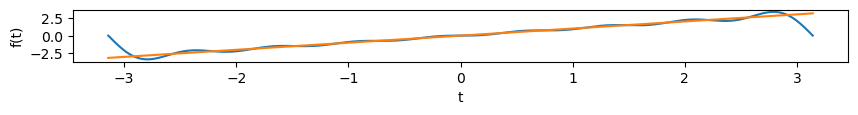

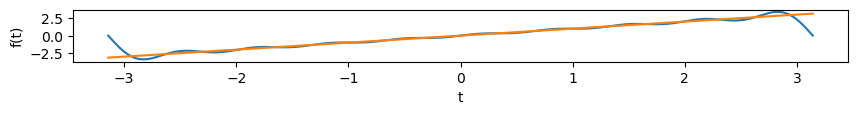

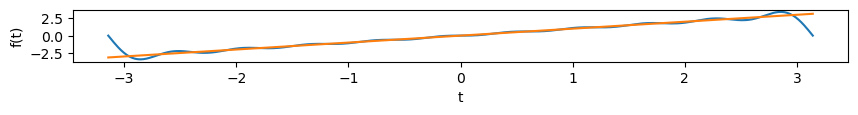

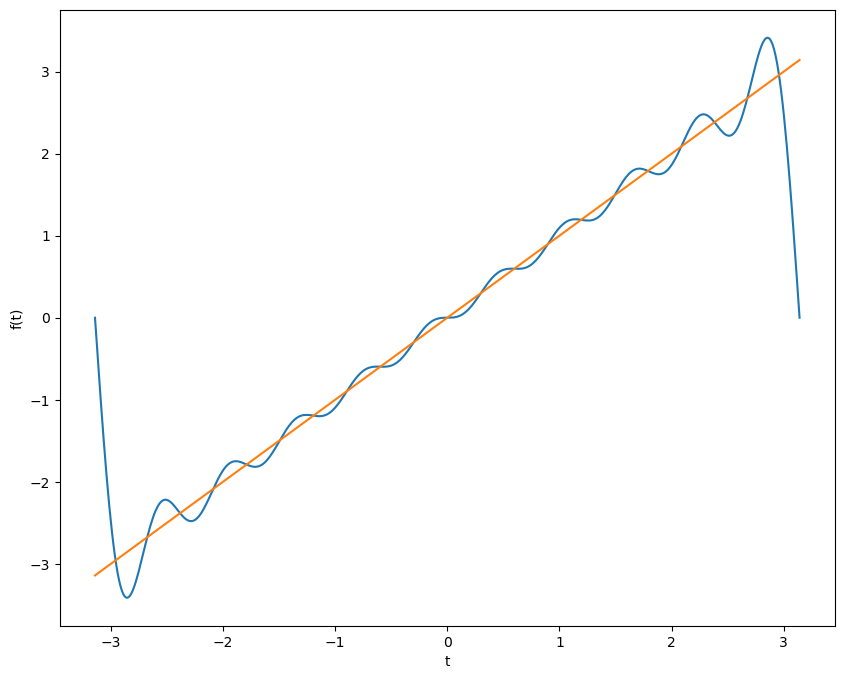

In [ ]:

n_length = 500;

Tmin = -np.pi;
Tmax = np.pi;
tvec = np.linspace(Tmin,Tmax,n_length, endpoint=True);

f_t = tvec;

# approximate with F series

n=50
Ff = np.zeros((n,n_length))
Ff_t = np.zeros(n_length)

plt.rcParams["figure.figsize"] = (10,8)

for i in range(1,n+1):
    Ff[i-1,:] = Bcoef(i, tvec);
    Ff_t[:] += Ff[i-1,:]
    #
    if(1):
        plt.subplot(n,1,i)
        plt.plot(tvec,Ff_t);
        plt.plot(tvec,f_t);
        plt.xlabel("t")
        plt.ylabel("f(t)")
        plt.show()

plt.plot(tvec,Ff_t);
plt.plot(tvec,f_t);
plt.xlabel("t")
plt.ylabel("f(t)")
plt.show()    

Výpočet Fourierovy řady pomocí nástrojů jazyka Python
- Sympy 
  - [fourier_series](https://docs.sympy.org/latest/modules/series/fourier.html#sympy.series.fourier.fourier_series)
  - truncate()
  - lambdify

In [6]:
from sympy import fourier_series, pi
from sympy.abc import x
from sympy import lambdify

Fs= 2*sin(x) - sin(2*x) + 2*sin(3*x)/3 - sin(4*x)/2 + 2*sin(5*x)/5 - sin(6*x)/3 + 2*sin(7*x)/7 - sin(8*x)/4 + 2*sin(9*x)/9 - sin(10*x)/5


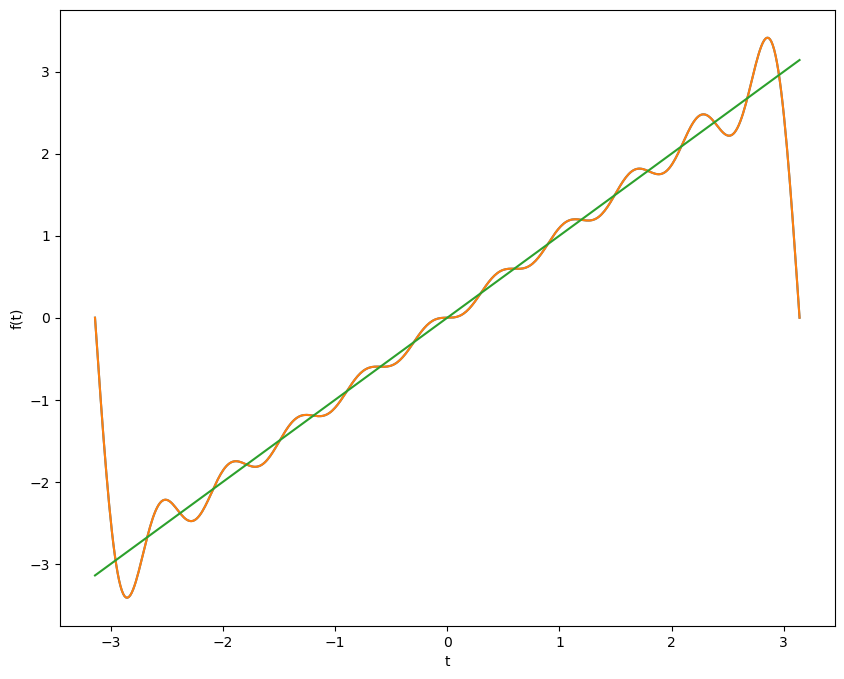

In [ ]:
s = fourier_series(x, (x, -pi, pi))
fun = s.truncate(n) #limit the series to n members
print('Fs=',fun)
Ff_ts = lambdify(x, fun,"numpy")

plt.plot(tvec,Ff_ts(tvec));
plt.plot(tvec,Ff_t);
plt.plot(tvec,f_t);
plt.xlabel("t")
plt.ylabel("f(t)")
plt.show() 

Pomocí fourierovy řady aproximujte 
- **lineární funkci**
$$f(t) = t$$
- **pilový signál**
$$f(t) = \frac{2}{\pi} \sin^{-1} \left(  \sin(2\pi ft) \right)$$
- **obdélníkový signál**
$$f(t) = {\rm sign}\left[ \sin(2\pi ft)) \right]$$

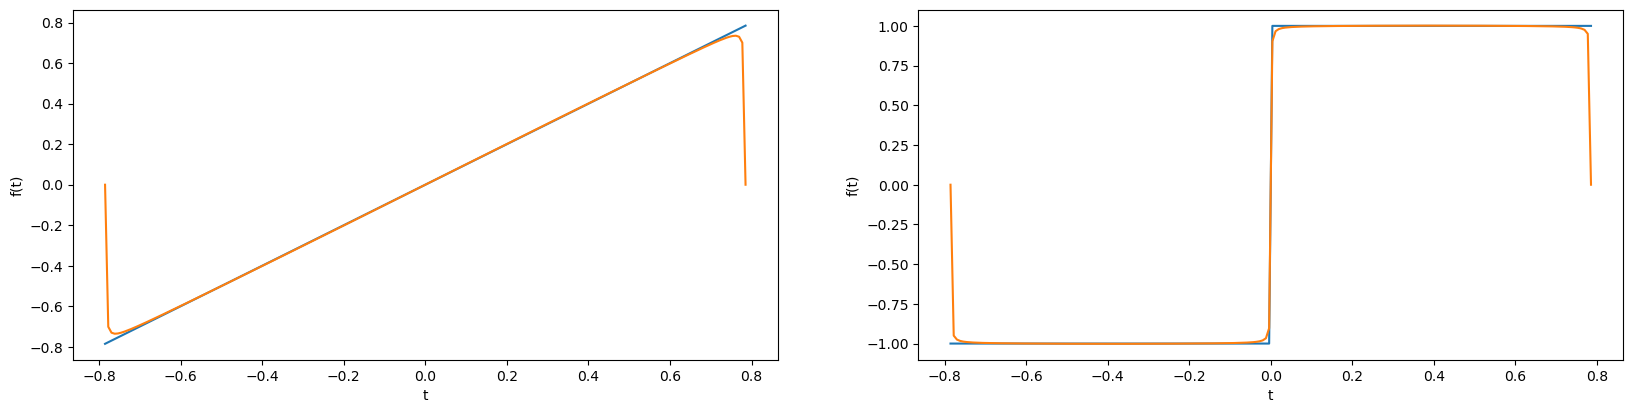

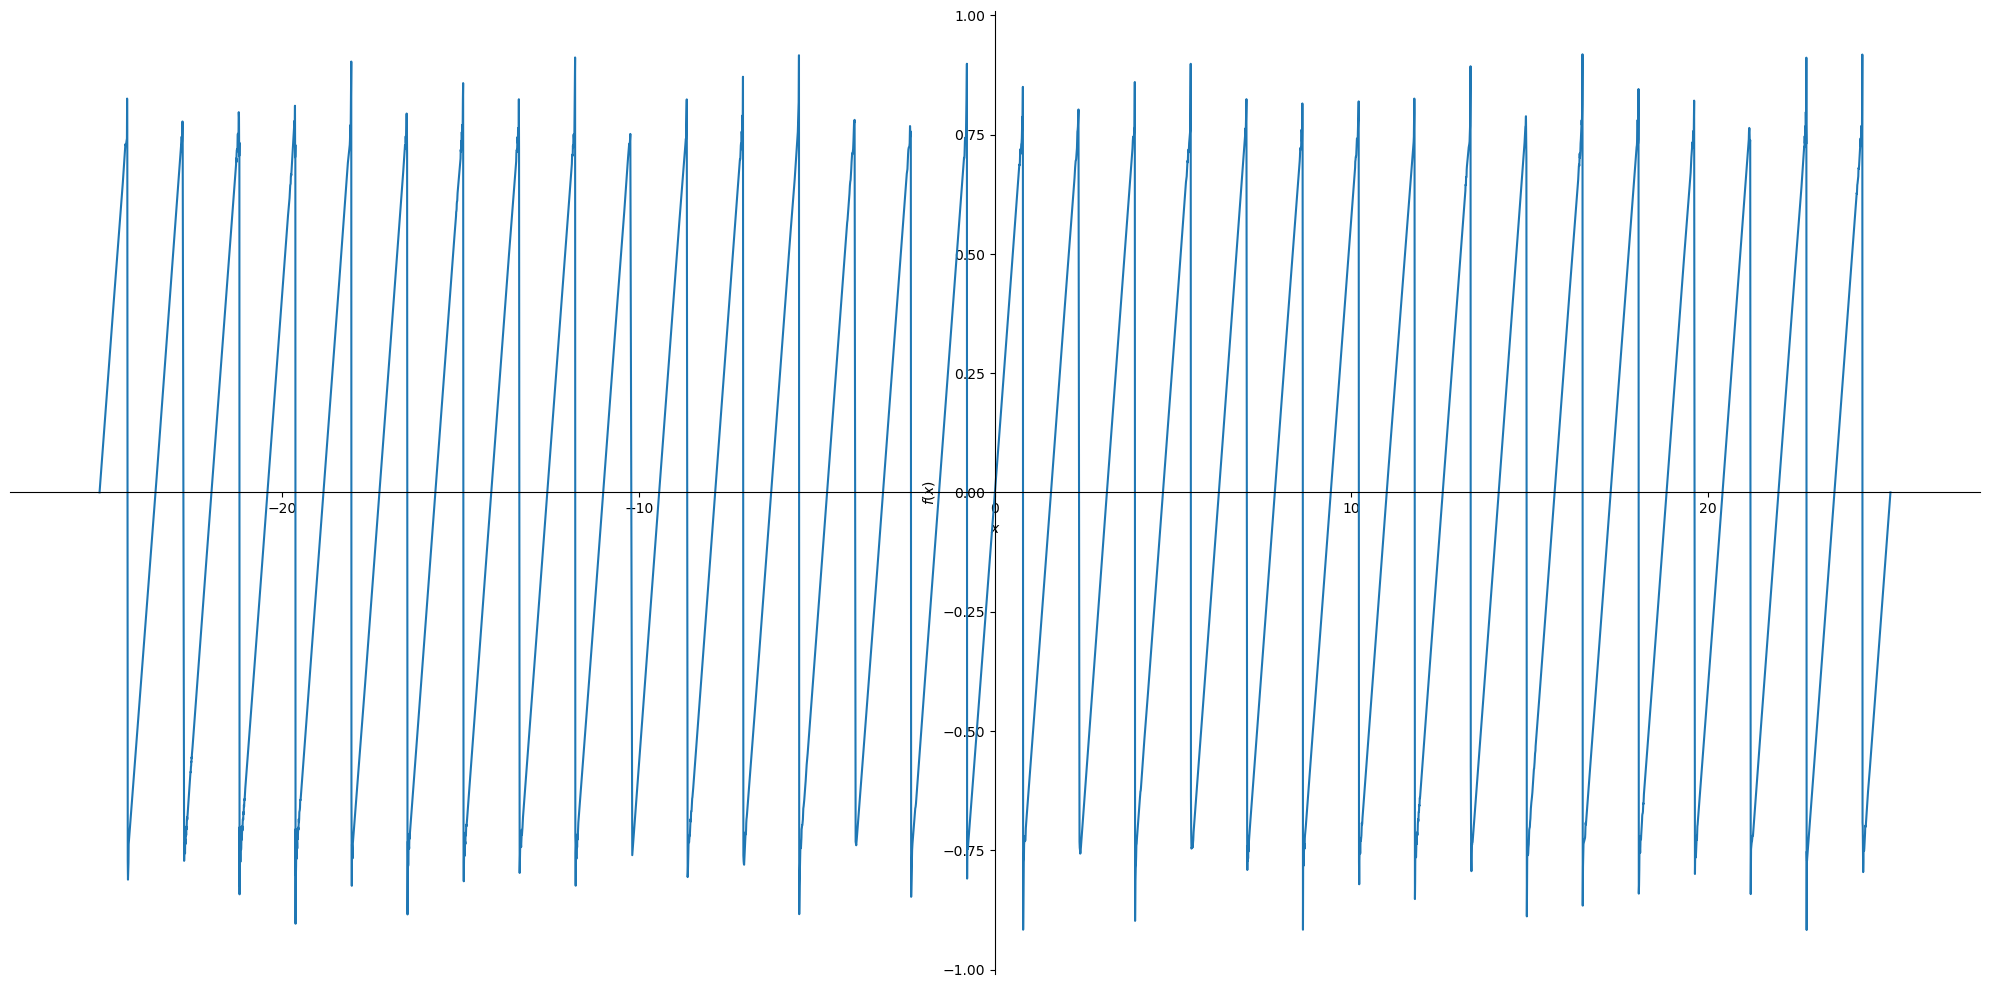

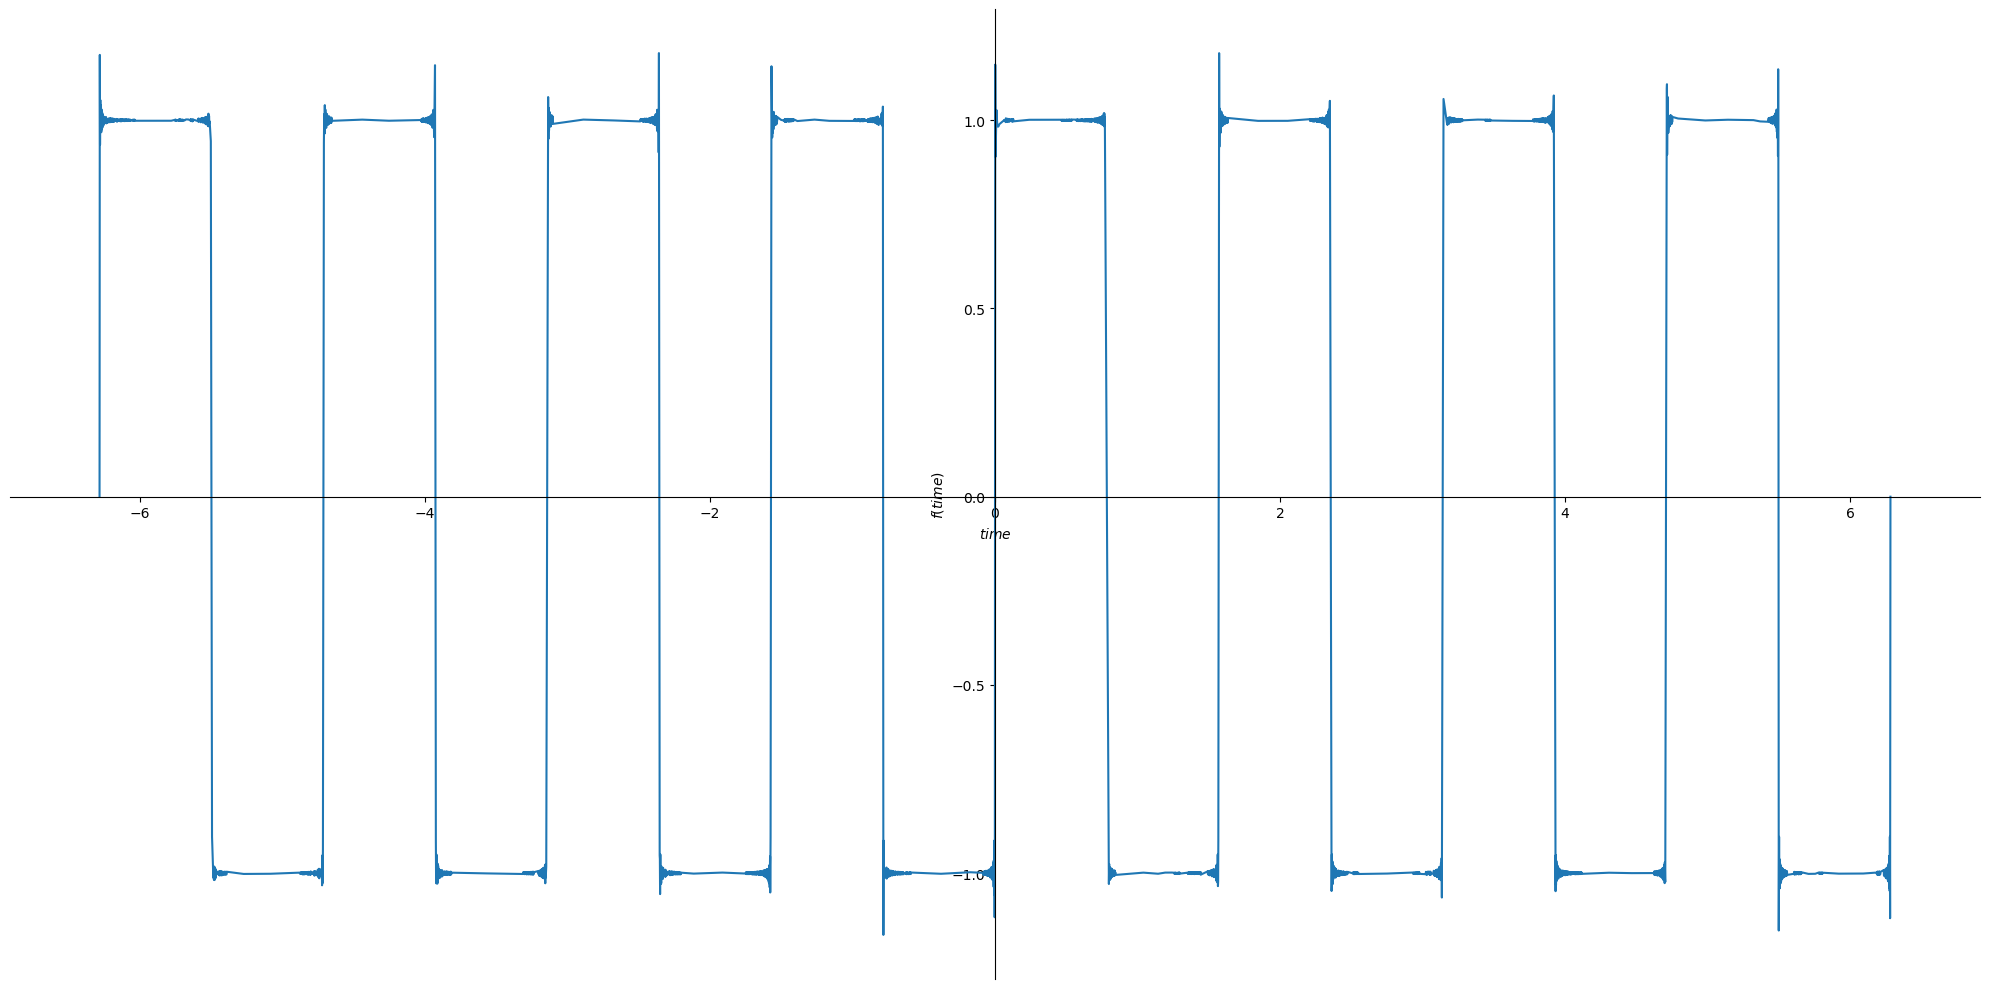

In [8]:
n_length = 200;

f = 0.5;
T=1/f;

Tmin = -np.pi/4;
Tmax = np.pi/4;
tvec = np.linspace(Tmin,Tmax,n_length, endpoint=True);

Xvals = np.zeros((2,n_length))
Xvals[0,:] = tvec
Xvals[1,:] = sp.signal.square(2*np.pi*f*tvec)

n=200;

# approximate linear function with F. series
s0 = fourier_series(x, (x, -pi/4, pi/4))
fun_s0 = s0.truncate(n) #limit the series to n members
#print('Linear=',fun_s0)
Ff_ts0 = lambdify(x, fun_s0,"numpy")


#define square wave in numpy
fun = np.sign(np.sin(2*np.pi*f*tvec))

#define square wave in sympy
from sympy import Symbol
from sympy import sign,sin, pi
from sympy import lambdify
from sympy import plot


freq=Symbol('freq');
time=Symbol('time');

# square wave 
expression = sign(sin(2*pi*f*time))
funR=expression.subs(freq,f)
s1 = fourier_series(funR, (time,-pi/4, pi/4))

fun_s1 = s1.scale(2).truncate(n); #limit the series to n members
#print('Rectang=',fun_s1)
Ff_ts1 = lambdify(time, fun_s1,"numpy");

#--------------------------------------------
plt.rcParams["figure.figsize"] = (20,10)

plt.subplot(2,2,1)
plt.plot(tvec,Xvals[0,:]);
plt.plot(tvec,Ff_ts0(tvec));

plt.xlabel("t");
plt.ylabel("f(t)");

plt.subplot(2,2,2)
plt.plot(tvec,Xvals[1,:]);
plt.plot(tvec,Ff_ts1(tvec));
plt.xlabel("t");
plt.ylabel("f(t)");

plt.show()

plot(fun_s0,(x,-8*pi,8*pi))
plot(fun_s1,(time,-2*pi,2*pi))

